In [1]:
import sys
sys.path.append('/project2/alvinjin_1630/results')

from Trainer import Trainer

/project2/alvinjin_1630


/home1/mkim2763/.local/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home1/mkim2763/.local/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home1/mkim2763/.local/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.htm

In [2]:
import torch, jax
print("PyTorch sees:", torch.cuda.device_count(), "GPUs,", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "none")
print("JAX sees:", jax.devices())

PyTorch sees: 2 GPUs, NVIDIA A100-PCIE-40GB
JAX sees: [CudaDevice(id=0), CudaDevice(id=1)]


In [3]:
# Trainer.start_optuna_dashboard()

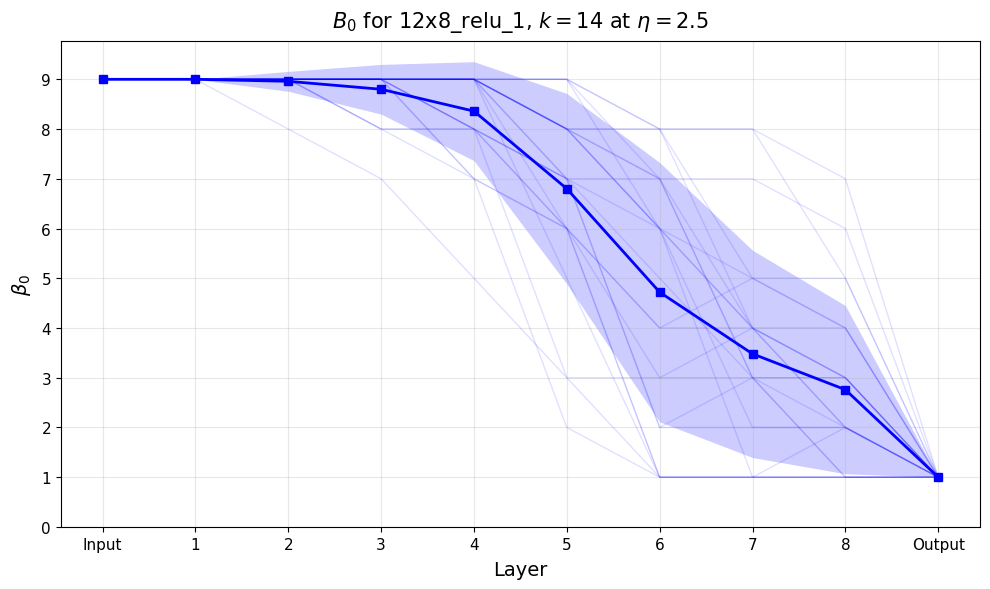

In [5]:
trainer = Trainer(
    dataset='D1',
    hidden_dims=[12] * 8,
    act_fn=jax.nn.relu,
    study_name='12x8_relu_1',
    residual=False
)

# trainer.run_optuna(
#     num_models=3,
#     T_func=lambda trial: 30,
#     start_lr_w_func=lambda trial: trial.suggest_float('lr_w', 1e-6, 8e-3, log=True),
#     start_lr_h_func=lambda trial: trial.suggest_float('lr_h', 1e-4, 1e-1, log=True),
#     trans_mult_func=lambda trial: trial.suggest_float('trans_mult', 3, 20),
#     decay_rate_func=lambda trial: trial.suggest_float('decay_rate', 0.85, 0.99),
#     add_trials=[{'lr_w': 2.163e-4, 'lr_h': 6.757e-2, 'trans_mult': 17.98, 'decay_rate': 0.9371}]
# )

# trainer.train_all_models(
#     T=30,
#     start_lr_w=0.00036340663921615894,
#     start_lr_h=0.09157391394687117,
#     trans_mult=7.474791510505344,
#     decay_rate=0.9340315443346907
# )

# trainer.run_ripser(min_accuracy=0.9)

trainer.graph_betti_numbers(dir_name='ripser_only_0_k14', k=14, etas=[2.5], maxdim=0, save=False)

# Code to move bad models over to a new file in case we wanna move them

import shutil
import os

def move_models(id_list):
    for m_id in id_list:
        file = f'model_{m_id}.npz'
        root = '/project2/alvinjin_1630/results/D1/12x8_relu_1'
        destination = f'{root}/trained_models/{file}'
        source = f'{root}/bad_models/{file}'
        # print(source)
        # print(destination)
        
        # Move the bad model from trained_models to bad_models
        try:
            shutil.move(source, destination)
            print(f"Successfully moved: {source} -> {destination}")
        except FileNotFoundError:
            print("Error: The source file does not exist.")
        except PermissionError:
            print("Error: Permission denied.")
        except Exception as e:
            print(f"An error occurred: {e}")

id_list = [0, 6, 7, 8, 12, 13, 14, 20, 21, 28, 30, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 49]
move_models(id_list)